In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import NullLocator, LinearLocator, MultipleLocator, IndexLocator, FixedLocator, LogLocator, MaxNLocator
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter

# 1997 - 2006, 2009 - 2023 погода Рязань

# data
данные обновлены 29.11.2023
- t  - температура
- p  - давление
- cloud - облачность
- precip - осадки/гроза
- wdir - направление ветра
- ws - скорость ветра 
<br> метка **d** в конце названия столбца указывает что данные **дневные**
<br> метка **n** в конце названия столбца указывает что данные **ночные**

In [3]:
data = pd.read_csv('data.csv', index_col='id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 8911
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     8912 non-null   int64  
 1   month    8912 non-null   int64  
 2   day      8912 non-null   int64  
 3   td       8897 non-null   float64
 4   pd       8897 non-null   float64
 5   cloudd   8897 non-null   object 
 6   precipd  1342 non-null   object 
 7   wdird    8897 non-null   object 
 8   wsd      8897 non-null   float64
 9   tn       8884 non-null   float64
 10  pn       8884 non-null   float64
 11  cloudn   8884 non-null   object 
 12  precipn  1189 non-null   object 
 13  wdirn    8884 non-null   object 
 14  wsn      8884 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 1.1+ MB


**словари для меток координатных осей**

In [5]:
months = ['Ja', 'Fe', 'Ma', 'Ap', 'May', 'June', 'July', 'Au', 'Se', 'Oc', 'No', 'De']
dictmonth = {1: {'a': 'Ян', 'f': 'Январь'}, 
             2: {'a': 'Фе', 'f': 'Февраль'}, 
             3: {'a': 'Март', 'f': 'Март'},
             4: {'a': 'Ап', 'f': 'Апрель'},
             5: {'a': 'Май', 'f': 'Май'},
             6: {'a': 'Июнь', 'f': 'Июнь'},
             7: {'a': 'Июль', 'f': 'Июль'},
             8: {'a': 'Ав', 'f': 'Август'},
             9: {'a': 'Се', 'f': 'Сентябрь'}, 
            10: {'a': 'Ок', 'f': 'Октябрь'},
            11: {'a': 'Но', 'f': 'Ноябрь'},
            12: {'a': 'Де', 'f': 'Декабрь'}}
colors = ['#E7EB0A', '#1AD90D',
          '#0722ED', '#a064b0', '#117E7D',
          '#77877C',
          '#E11414', '#E4800F', '#7E7711']
seasons = ['зима', 'весна', 'лето', 'осень']

# сила ветра

#### средняя сила ветра, медиана скорости

In [6]:
midspeed = data['wsd'].mean().round(2)
print(f'средняя скорость ветра в Рязани днем за отобранный период времени {midspeed} м/с')
medspeed = data['wsd'].median()
print(f'медиана дневной скорости ветра {medspeed} м/с')

средняя скорость ветра в Рязани днем за отобранный период времени 2.79 м/с
медиана дневной скорости ветра 3.0 м/с


In [7]:
midspeed = data['wsn'].mean().round(2)
print(f'средняя скорость ветра в Рязани ночью {midspeed} м/с')
medspeed = data['wsn'].median()
print(f'медиана ночной скорости ветра {medspeed} м/с')

средняя скорость ветра в Рязани ночью 2.79 м/с
медиана ночной скорости ветра 3.0 м/с


In [8]:
# данные дневного и ночного ветров повторяются в 99.5% случаев
(data.wsd == data.wsn).mean()

0.9951750448833034

###### средняя сила ветра по времени года

In [9]:
wsm = data.groupby(['month']).agg({'wsd':'mean'})
print('средняя скорость:\nзимой:', *wsm.loc[[12, 1, 2]].mean().round(2),\
      '\nвесной:', *wsm.loc[[3, 4, 5]].mean().round(2),\
      '\nлетом:', *wsm.loc[[6, 7, 8]].mean().round(2),\
      '\nосенью:', *wsm.loc[[9, 10, 11]].mean().round(2))
print('\nмедиана скорости:\nзимой:', *wsm.loc[[12, 1, 2]].median().round(2),\
      '\nвесной:', *wsm.loc[[3, 4, 5]].median().round(2),\
      '\nлетом:', *wsm.loc[[6, 7, 8]].median().round(2),\
      '\nосенью:', *wsm.loc[[9, 10, 11]].median().round(2))

средняя скорость:
зимой: 2.82 
весной: 3.18 
летом: 2.48 
осенью: 2.7

медиана скорости:
зимой: 2.75 
весной: 3.26 
летом: 2.42 
осенью: 2.67


###### средняя скорость ветра по месяцам

In [10]:
for i in wsm.index:
    print(dictmonth[i]['f'], *wsm.loc[i].values.round(2))

Январь 2.75
Февраль 2.99
Март 3.26
Апрель 3.27
Май 3.01
Июнь 2.62
Июль 2.42
Август 2.4
Сентябрь 2.52
Октябрь 2.91
Ноябрь 2.67
Декабрь 2.73


###### максимальная скорость

In [11]:
spmax = data[data['wsd'] == data['wsd'].max()]
[print(f"ветер {spmax.loc[i].day}.{spmax.loc[i].month}.{spmax.loc[i].year} в {spmax.loc[i].wdird} направлении дул со скоростью {spmax.loc[i].wsd}") for i in spmax.index];

ветер 7.10.2003 в ЮЗ направлении дул со скоростью 10.0


### 8. средняя сила ветра по годам

In [12]:
midspeedyear = data.groupby('year').agg({'wsd':'mean'})

In [13]:
# выбор среднего значения штилей
dwpy = pd.read_json('napravlenie_vetrov/dir_wind_percent_year.json')
s97po12 = dwpy.loc['Ш'][:14].mean().round(2)
s13po23 = dwpy.loc['Ш'][14:].mean().round(2)

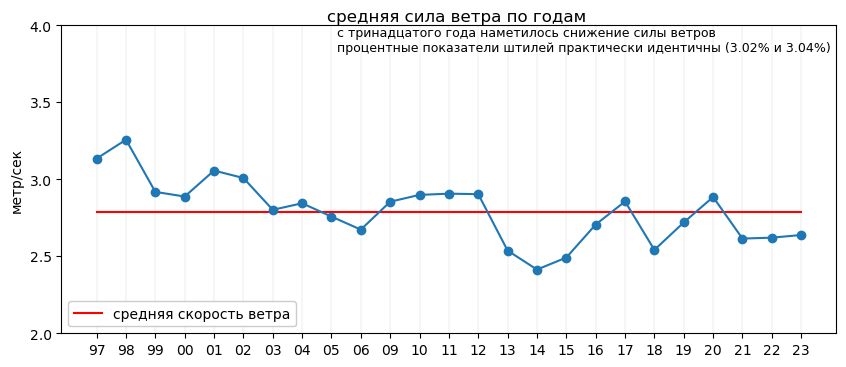

In [14]:
fig8 = plt.figure(figsize=(10, 4))
fig8.suptitle('средняя сила ветра по годам',x=0.52,y=0.92, fontsize=12)
ax_msy = fig8.add_subplot()
ax_msy.plot(np.arange(len(midspeedyear.index)), np.full(25, midspeed), label='средняя скорость ветра', c='r')
ax_msy.plot(np.arange(len(midspeedyear.index)), midspeedyear['wsd'], marker='o')
ax_msy.xaxis.set_major_locator(FixedLocator(np.arange(len(midspeedyear.index))))
ax_msy.xaxis.set_major_formatter(FixedFormatter([str(i)[2:] for i in midspeedyear.index.values]))
ax_msy.yaxis.set_major_locator(FixedLocator(np.arange(2, 5, 0.5)))
ax_msy.text(8.2, 3.83, f'с тринадцатого года наметилось снижение силы ветров\
\nпроцентные показатели штилей практически идентичны ({s97po12}% и {s13po23}%)', fontsize=9)
ax_msy.set_ylabel('метр/сек')
ax_msy.legend(loc=3, framealpha=1)
plt.ylim(2, 4)
plt.grid(axis='x', linewidth=0.15);

### 9. средняя сила ветра по месяцам

In [15]:
midspeedmonth = data.groupby('month').agg({'wsd':'mean'})
num = np.arange(len(midspeedmonth.index.values))

In [16]:
# подсчет штилей
dwpm = pd.read_json('napravlenie_vetrov/dir_wind_percent_month.json')
vesna = dwpm[['2', '3', '4', '5']].loc['Ш'].mean().round(2)
leto = dwpm[['6', '7', '8', '9']].loc['Ш'].mean().round(2)

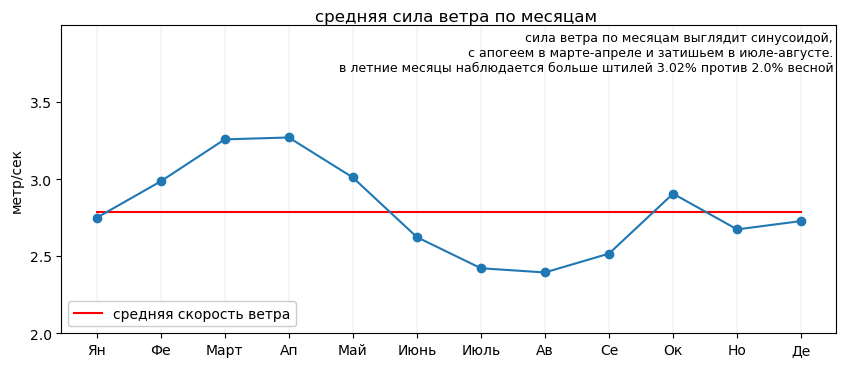

In [17]:
fig9 = plt.figure(figsize=(10, 4))
fig9.suptitle('средняя сила ветра по месяцам',x=0.52,y=0.92, fontsize=12)
ax_msm = fig9.add_subplot()
ax_msm.plot(num, np.full(12, midspeed), label='средняя скорость ветра', c='r')
ax_msm.plot(np.arange(len(midspeedmonth.index)), midspeedmonth, marker='o')
ax_msm.xaxis.set_major_locator(FixedLocator(num))
ax_msm.xaxis.set_major_formatter(FixedFormatter([dictmonth[i+1]['a'] for i in num]))
ax_msm.set_ylabel('метр/сек')
ax_msm.yaxis.set_major_locator(FixedLocator(np.arange(2, 4, 0.5)))
ax_msm.text(11.5, 3.7,\
           f'сила ветра по месяцам выглядит синусоидой,\
\nс апогеем в марте-апреле и затишьем в июле-августе.\
\nв летние месяцы наблюдается больше штилей {leto}% против {vesna}% весной', fontsize=9, ha='right');
ax_msm.legend(loc=3, framealpha=1)
plt.ylim(2, 4)
plt.grid(axis='x', linewidth=0.15);

### 10. средняя сила ветра по временам года

In [18]:
# подсчет сезонных показателей
season = pd.DataFrame([midspeedmonth.iloc[[i+j for j in range (3)]].mean().round(2) for i in range(-1, 11, 3)], index=seasons)

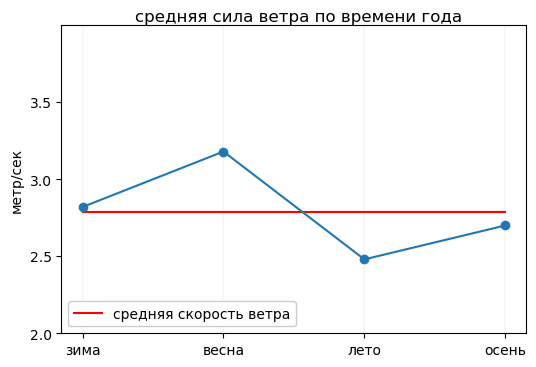

In [19]:
fig10 = plt.figure(figsize=(6, 4))
fig10.suptitle('средняя сила ветра по времени года',x=0.52,y=0.92, fontsize=12)
ax_ssm = fig10.add_subplot()
ax_ssm.plot(np.arange(4), np.full(4, midspeed), label='средняя скорость ветра', c='r')
ax_ssm.plot(season.index, season.wsd,  marker='o')
ax_ssm.set_ylabel('метр/сек')
ax_ssm.legend(loc=3, framealpha=1)
ax_ssm.yaxis.set_major_locator(FixedLocator(np.arange(2, 4, 0.5)))
plt.ylim(2, 4)
plt.grid(axis='x', linewidth=0.15);

### 11. метрики силы ветра по годам

In [87]:
# форматировать данные для boxplot
yws_pivot = data[['year', 'wsd']].pivot(columns='year', values='wsd')

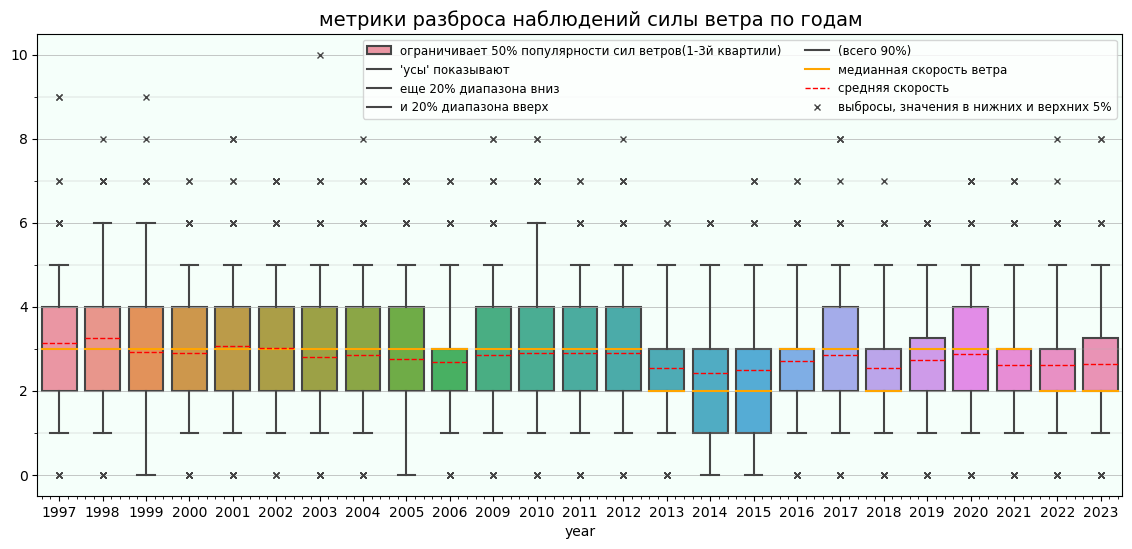

In [123]:
fig11 = plt.figure(figsize=(14, 6))
fig11.suptitle('метрики разброса наблюдений силы ветра по годам',x=0.52,y=0.92, fontsize=14)
ax_msy2 = fig11.add_subplot()
sns.boxplot(data=yws_pivot,\
            flierprops={'marker':'x'},\
            whis=(5, 95),\
            showmeans=True, meanline=True, meanprops={'color':'r', },\
            medianprops={'color':'orange'},\
            labels=["Metriс"])
ax_msy2.set_facecolor('MintCream')
ax_msy2.minorticks_on()
ax_msy2.grid(which='minor', lw=0.25, axis='y')
ax_msy2.grid(which='major', lw=0.5, axis='y')
ax_msy2.yaxis.set_minor_locator(FixedLocator([1, 3, 5, 7, 9]))
box = {'facecolor': 'white', 'edgecolor': 'gray','boxstyle': 'round'}
ax_msy2.legend(labels=["ограничивает 50% популярности сил ветров(1-3й квартили)",\
                "'усы' показывают",\
                "еще 20% диапазона вниз",\
                "и 20% диапазона вверх",\
                "(всего 90%)",\
                "медианная скорость ветра",\
                "средняя скорость",\
                "выбросы, значения в нижних и верхних 5%"],\
               ncols=2, loc=1, fontsize=8.5);

### 12. скорости за весь период

In [132]:
wpp = data.groupby('wsd')['wsd'].count()

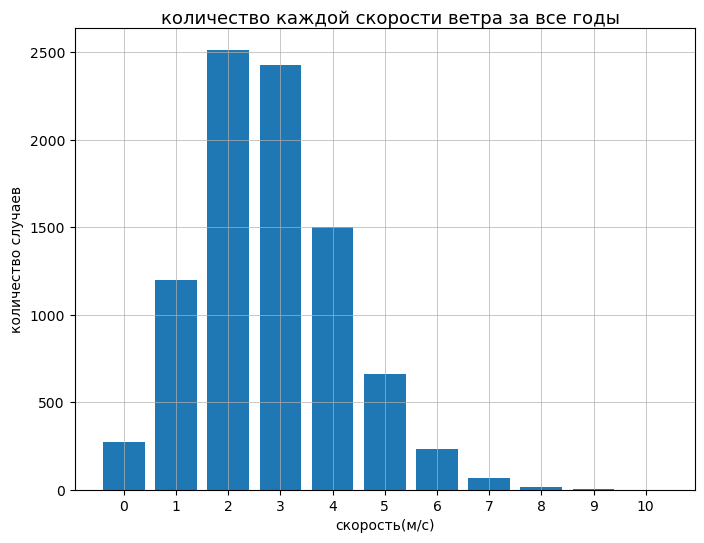

In [134]:
fig12 = plt.figure(figsize=(8, 6))
fig12.suptitle('количество каждой скорости ветра за все годы',x=0.52,y=0.91, fontsize=13)
ax_wpp = fig12.add_subplot()
ax_wpp.xaxis.set_major_locator(FixedLocator(wpp.index))
ax_wpp.bar(x= wpp.index, height=wpp)
ax_wpp.set_xlabel('скорость(м/с)')
ax_wpp.set_ylabel('количество случаев')
ax_wpp.grid(which='major', lw=0.5);